<a href="https://colab.research.google.com/github/juliogdomingues/icd_ufmg/blob/main/(LM4)_Lista_Aberta_8_Comparando_ClassificadoresTarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista Aberta do Módulo 4 - Comparando Classificadores

**Regras para envio:**

1. Faça uma cópia deste arquivo
2. Deixe o arquivo aberto para qualquer pessoa com o link (Share > Anyone with the link)
3. Garanta que as saídas do notebook estão salvas (Settings > deixe desligada a opção (New notebooks use private outputs (omit outputs when saving)), e acesse o link depois em outro navegador para garantir que estão!)
4. Digite seu nome Júlio Guerra Domingues
5. Após finalizar o exercício, poste o link (apenas o link!) no moodle.

**Atenção**: como temos pouco tempo para o fechamento do semestre, por favor garantam que seus links estão corretos! Não teremos tempo para correções. É essencial que os alunos de ICD saibam usar o Google Colab.

## Identificação de malignidade em tumores de mama - UCI ML Breast Cancer Wisconsin (Diagnostic)

Neste trabalho você deverá realizar uma comparação entre o k-Nearest Neighbors (KNN) e o Random Forest para classificação de pacientes com tumores na mama (maligno = 1 vs benigno = 0). Para isso, usaremos o dataset de câncer de mama de UCI (já embutido no sklearn).

A avaliação dos métodos deverá ser feito usando precisão, revocação e F1. Você também deve reportar a matriz de confusão.

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca scikit-learn da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

## Importando módulos e baixando dataset

In [ ]:
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, train_test_split, KFold

from scipy.stats import ttest_rel

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns =[cancer.feature_names])
features = df.columns

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#Para acessar as labels
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#Pegar as colunas que serão usadas na classificação
features = df.columns

# Número de folds da validação cruzada
SPLITS = 5

Se tiver dúvidas sobre a validação cruzada, recomendo :https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e . Para regressão, vocês usaram o kfold, agora recomendo a utilização do StratifiedKFold.

# Exercício 01:

Use o RandomForest para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:
* Varie a o número de árvores (n_estimators) e a profundidade máxima da árvore (n_estimators). Faça pelo menos 4 configurações.
* Realize validação cruzada, com k-fold igual a 5
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [ ]:
# Definindo as configurações de número de árvores e profundidade máxima
configs = [
    (10, None),  # 10 árvores, profundidade ilimitada
    (50, 10),    # 50 árvores, profundidade máxima 10
    (100, 20),   # 100 árvores, profundidade máxima 20
    (200, None)  # 200 árvores, profundidade ilimitada
]

# Separando os dados em features e target
X = df[features]
y = cancer.target

# Loop pelas configurações
for n_estimators, max_depth in configs:
    print("-" * 50)
    print(f"Configuração: n_estimators={n_estimators}, max_depth={max_depth}")

    # Criando o modelo Random Forest
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    # Validação cruzada estratificada
    skf = StratifiedKFold(n_splits=SPLITS, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=skf)

    # Calculando as métricas
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    conf_mat = confusion_matrix(y, y_pred)

    # Imprimindo os resultados
    print(f"Precisão: {precision:.4f}")
    print(f"Revocação: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Matriz de Confusão:")
    print(conf_mat)

--------------------------------------------------
Configuração: n_estimators=10, max_depth=None
Precisão: 0.9473
Revocação: 0.9473
F1-Score: 0.9473
Matriz de Confusão:
[[197  15]
 [ 15 342]]
--------------------------------------------------
Configuração: n_estimators=50, max_depth=10
Precisão: 0.9542
Revocação: 0.9543
F1-Score: 0.9543
Matriz de Confusão:
[[198  14]
 [ 12 345]]
--------------------------------------------------
Configuração: n_estimators=100, max_depth=20
Precisão: 0.9560
Revocação: 0.9561
F1-Score: 0.9560
Matriz de Confusão:
[[199  13]
 [ 12 345]]
--------------------------------------------------
Configuração: n_estimators=200, max_depth=None
Precisão: 0.9542
Revocação: 0.9543
F1-Score: 0.9543
Matriz de Confusão:
[[198  14]
 [ 12 345]]


# Exercício 02:

Use a knn para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:

* Escolha e reporte resultados com 3 números de vizinhos diferentes (k)
* Realize validação cruzada, com k-fold igual a 5 (para cada um dos k vizinhos)
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


In [ ]:
# Definindo os valores de k para o KNN
k_values = [3, 5, 7]

# Separando os dados em features e target
X = df[features]
y = cancer.target

# Loop pelos valores de k
for k in k_values:
    print("-" * 50)
    print(f"Configuração: k = {k}")

    # Criando o modelo KNN
    model = KNeighborsClassifier(n_neighbors=k)

    # Validação cruzada estratificada
    skf = StratifiedKFold(n_splits=SPLITS, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=skf)

    # Calculando as métricas
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    conf_mat = confusion_matrix(y, y_pred)

    # Imprimindo os resultados
    print(f"Precisão: {precision:.4f}")
    print(f"Revocação: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Matriz de Confusão:")
    print(conf_mat)

--------------------------------------------------
Configuração: k = 3
Precisão: 0.9277
Revocação: 0.9279
F1-Score: 0.9277
Matriz de Confusão:
[[188  24]
 [ 17 340]]
--------------------------------------------------
Configuração: k = 5
Precisão: 0.9349
Revocação: 0.9350
F1-Score: 0.9347
Matriz de Confusão:
[[189  23]
 [ 14 343]]
--------------------------------------------------
Configuração: k = 7
Precisão: 0.9280
Revocação: 0.9279
F1-Score: 0.9274
Matriz de Confusão:
[[185  27]
 [ 14 343]]


# Exercício 03:

Compare os resultados (F1 de cada método com cada configuração) em um gráfico. Qual foi o melhor método? Houve diferença significativa com as variações de parâmetros?


===== Random Forest =====

RF (10, None): F1-Score médio = 0.9472

RF (50, 10): F1-Score médio = 0.9542

RF (100, 20): F1-Score médio = 0.9560

RF (200, None): F1-Score médio = 0.9542

Comparando RF (10, None) e RF (50, 10):
  Estatística t: -0.9171
  Valor-p: 0.4110
  Conclusão: Não há diferença estatisticamente significativa

Comparando RF (10, None) e RF (100, 20):
  Estatística t: -1.3958
  Valor-p: 0.2353
  Conclusão: Não há diferença estatisticamente significativa

Comparando RF (10, None) e RF (200, None):
  Estatística t: -0.9826
  Valor-p: 0.3814
  Conclusão: Não há diferença estatisticamente significativa

Comparando RF (50, 10) e RF (100, 20):
  Estatística t: -0.5551
  Valor-p: 0.6084
  Conclusão: Não há diferença estatisticamente significativa

Comparando RF (50, 10) e RF (200, None):
  Estatística t: -0.0056
  Valor-p: 0.9958
  Conclusão: Não há diferença estatisticamente significativa

Comparando RF (100, 20) e RF (200, None):
  Estatística t: 1.0000
  Valor-p: 0.3739
 

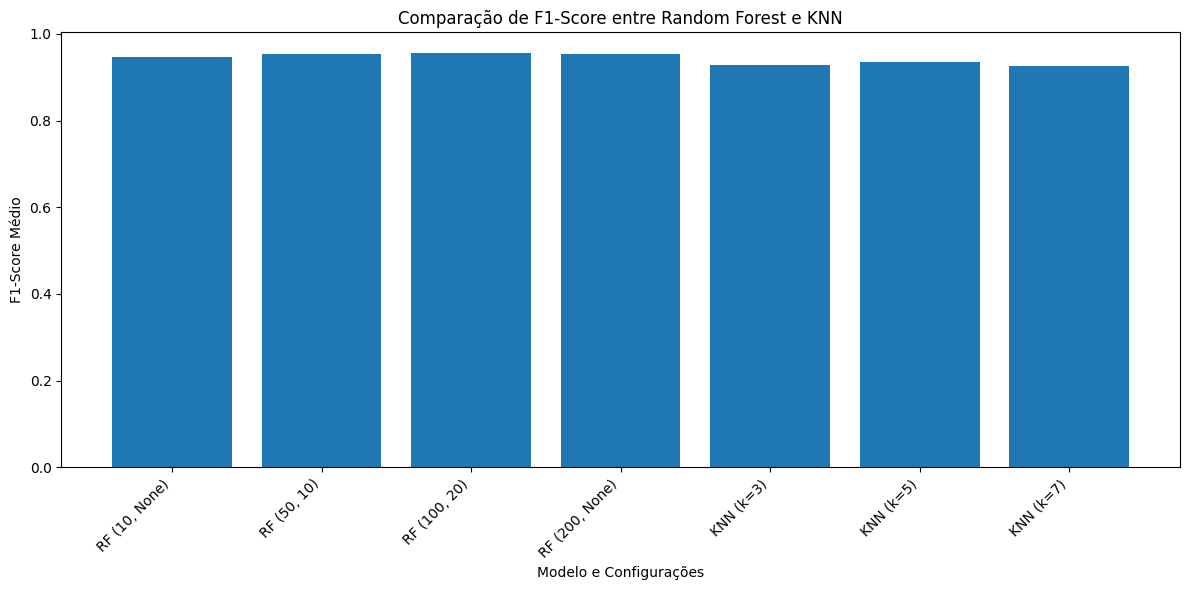

In [ ]:
# Configurações para Random Forest
rf_configs = [
    (10, None, 'RF (10, None)'),
    (50, 10, 'RF (50, 10)'),
    (100, 20, 'RF (100, 20)'),
    (200, None, 'RF (200, None)')
]

# Valores de k para KNN
knn_k_values = [3, 5, 7]

# Separando os dados em features e target
X = df[features]
y = cancer.target

# Listas para armazenar os resultados do F1-Score
rf_results = []
knn_results = []

# --- Random Forest ---
print("\n===== Random Forest =====")
for n_estimators, max_depth, label in rf_configs:
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    skf = StratifiedKFold(n_splits=SPLITS, shuffle=True, random_state=42)
    f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1_weighted')
    rf_results.append((label, f1_scores))
    print(f"\n{label}: F1-Score médio = {f1_scores.mean():.4f}")

# Comparações entre as Random Forests
for i in range(len(rf_results) - 1):
    for j in range(i + 1, len(rf_results)):
        t_statistic, p_value = ttest_rel(rf_results[i][1], rf_results[j][1])
        print(f"\nComparando {rf_results[i][0]} e {rf_results[j][0]}:")
        print(f"  Estatística t: {t_statistic:.4f}")
        print(f"  Valor-p: {p_value:.4f}")
        if p_value < 0.05:
            print("  Conclusão: Diferença estatisticamente significativa")
        else:
            print("  Conclusão: Não há diferença estatisticamente significativa")

# --- KNN ---
print("\n===== KNN =====")
for k in knn_k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    skf = StratifiedKFold(n_splits=SPLITS, shuffle=True, random_state=42)
    f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1_weighted')
    knn_results.append((f'KNN (k={k})', f1_scores))
    print(f"\nKNN (k={k}): F1-Score médio = {f1_scores.mean():.4f}")

# Comparações entre os KNNs
for i in range(len(knn_results) - 1):
    for j in range(i + 1, len(knn_results)):
        t_statistic, p_value = ttest_rel(knn_results[i][1], knn_results[j][1])
        print(f"\nComparando {knn_results[i][0]} e {knn_results[j][0]}:")
        print(f"  Estatística t: {t_statistic:.4f}")
        print(f"  Valor-p: {p_value:.4f}")
        if p_value < 0.05:
            print("  Conclusão: Diferença estatisticamente significativa")
        else:
            print("  Conclusão: Não há diferença estatisticamente significativa")

# --- Comparando o melhor Random Forest com o melhor KNN ---
best_rf = max(rf_results, key=lambda x: x[1].mean())
best_knn = max(knn_results, key=lambda x: x[1].mean())

t_statistic, p_value = ttest_rel(best_rf[1], best_knn[1])
print(f"\nComparando {best_rf[0]} e {best_knn[0]}:")
print(f"  Estatística t: {t_statistic:.4f}")
print(f"  Valor-p: {p_value:.4f}")
if p_value < 0.05:
    print("  Conclusão: Diferença estatisticamente significativa")
else:
    print("  Conclusão: Não há diferença estatisticamente significativa")

# --- Gráfico ---
labels = [result[0] for result in rf_results + knn_results]
f1_scores_mean = [result[1].mean() for result in rf_results + knn_results]

plt.figure(figsize=(12, 6))
plt.bar(labels, f1_scores_mean)
plt.xlabel("Modelo e Configurações")
plt.ylabel("F1-Score Médio")
plt.title("Comparação de F1-Score entre Random Forest e KNN")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Embora as diferenças sejam pequenas, o Random Forest com 100 estimadores e profundidade máxima 20 se mostrou a melhor escolha neste caso. A variação dos parâmetros no Random Forest não resultou em diferenças significativas, enquanto houve tal diferença com a mudança no número de vizinhos de 5 para 7 nos modelos KNN.

# Exercício 04:

Escolha a melhor configuração/método e refaça o modelo, agora usando apenas 5 features. (Você pode selecionar aleatoriamente ou usar alguma metodologia de feature selection). O que aconteceu com a F1? Por quê?

In [ ]:
# Separando os dados em features e target
X = df[features]
y = cancer.target

# --- Modelo completo (melhor Random Forest) ---
best_model_full = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
skf = StratifiedKFold(n_splits=SPLITS, shuffle=True, random_state=42)
f1_scores_full = cross_val_score(best_model_full, X, y, cv=skf, scoring='f1_weighted')
print(f"\nRF (100, 20) com todas features: F1-Score médio = {f1_scores_full.mean():.4f}")

# --- Modelo com 5 melhores features ---
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)

best_model_5features = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
skf = StratifiedKFold(n_splits=SPLITS, shuffle=True, random_state=42)
y_pred_new = cross_val_predict(best_model_5features, X_new, y, cv=skf)
f1_scores_5features = cross_val_score(best_model_5features, X_new, y, cv=skf, scoring='f1_weighted')
print(f"RF (100, 20) com 5 melhores features: F1-Score médio = {f1_scores_5features.mean():.4f}")

# --- Teste t pareado entre o modelo completo e com 5 features ---
t_statistic, p_value = ttest_rel(f1_scores_full, f1_scores_5features)
print(f"\nComparando RF com todas features e RF com 5 features:")
print(f"  Estatística t: {t_statistic:.4f}")
print(f"  Valor-p: {p_value:.4f}")
if p_value < 0.05:
    print("  Conclusão: Diferença estatisticamente significativa")
else:
    print("  Conclusão: Não há diferença estatisticamente significativa")


RF (100, 20) com todas features: F1-Score médio = 0.9560
RF (100, 20) com 5 melhores features: F1-Score médio = 0.9398

Comparando RF com todas features e RF com 5 features:
  Estatística t: 1.6066
  Valor-p: 0.1834
  Conclusão: Não há diferença estatisticamente significativa


O F1-score ficou levemente reduzido na comparação com o modelo completo. Com base no resultado acima, F1-scores sem diferenças significativas, temos que a redução de dimensionalidade foi bem sucedida.